In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [168]:
#1
#number of records in data
print(f"Number of rows = {df.shape[0]}")

Number of rows = 11914


In [169]:
#2
#number of features in data
print(f"Number of columns = {df.shape[1]}")

Number of columns = 16


In [170]:
#3
#number of duplicated values
print(f"Number of duplicates {df.duplicated().sum()}")
#dropping duplicates
df.drop_duplicates(inplace=True)
print(f"Number of duplicates {df.duplicated().sum()}")

Number of duplicates 715
Number of duplicates 0


In [171]:
#4 (1)
#features that has null
df.columns[df.isna().any()]

Index(['Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'Market Category'],
      dtype='object')

In [172]:
#4 (2)
#number of null values in data
print(f"Number of Nulls {df.isna().any(axis=1).sum()}")
#dropping Null Values
df.dropna(inplace=True)
print(df.isna().any(axis=1).sum())
# df.isna().sum()

Number of Nulls 3464
0


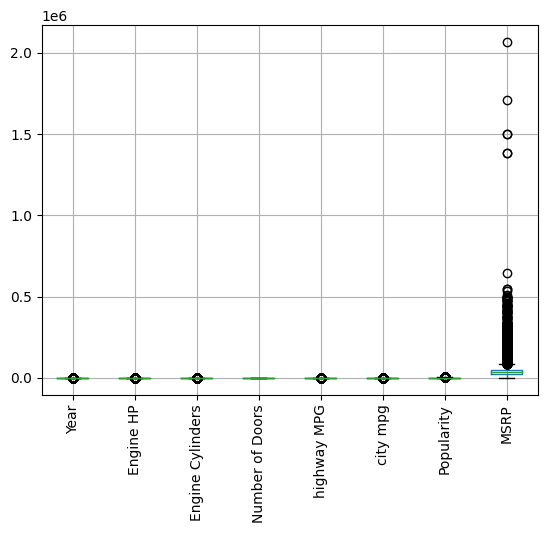

In [173]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [181]:
#5
#define outliers
numerical_values = df.select_dtypes(include=['int64', 'float64'])
Q1 = numerical_values.quantile(0.25)
Q3 = numerical_values.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numerical_values < (Q1 - 1.5 * IQR)) | (numerical_values > (Q3 + 1.5 * IQR))).any(axis=1)
outliers.sum() #there are 2830 outliers
#removing outliers
df = df[~outliers]
print(outliers.sum()) #it gets removed by rerunning the cell multiple times and then its removed

0


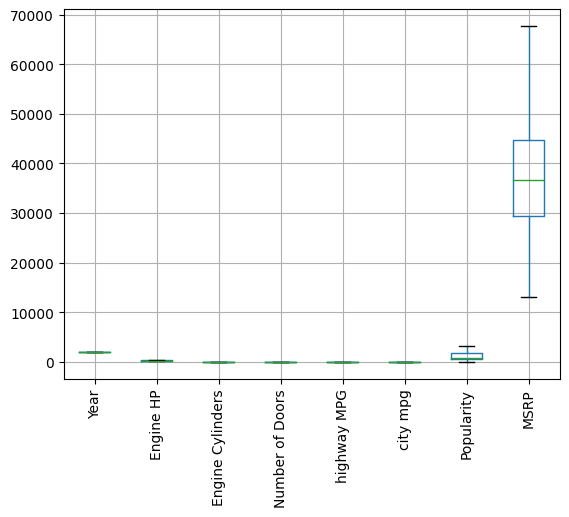

In [184]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [186]:
#dropping these cols
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2601 entries, 64 to 11880
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               2601 non-null   object 
 1   Model              2601 non-null   object 
 2   Year               2601 non-null   int64  
 3   Engine HP          2601 non-null   float64
 4   Engine Cylinders   2601 non-null   float64
 5   Transmission Type  2601 non-null   object 
 6   Driven_Wheels      2601 non-null   object 
 7   highway MPG        2601 non-null   int64  
 8   city mpg           2601 non-null   int64  
 9   MSRP               2601 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 223.5+ KB


In [187]:
#renaming cols
df = df.rename(columns={
    "Engine HP": "HP",
    "Engine Cylinders": "Cylinders",
    "Transmission Type": "Transmission",
    "Driven_Wheels": "Drive Mode",
    "highway MPG": "MPG-H",
    "city mpg": "MPG-C",
    "MSRP": "Price"
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2601 entries, 64 to 11880
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          2601 non-null   object 
 1   Model         2601 non-null   object 
 2   Year          2601 non-null   int64  
 3   HP            2601 non-null   float64
 4   Cylinders     2601 non-null   float64
 5   Transmission  2601 non-null   object 
 6   Drive Mode    2601 non-null   object 
 7   MPG-H         2601 non-null   int64  
 8   MPG-C         2601 non-null   int64  
 9   Price         2601 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 223.5+ KB
